In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
ct_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
md_df = pd.read_csv("raw_data/mouse_drug_data.csv")

merged_df = pd.merge(ct_df, md_df, on="Mouse ID")
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
#merged_df['Drug'].unique()

#group_drug_df.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
#keep: Capomulin, Infubinol, Ketapril, and Placebo
merged_df.loc[(merged_df['Drug'] != 'Ceftamin') & \
              (merged_df['Drug'] !='Naftisol') & \
              (merged_df['Drug'] !='Naftisol') & \
              (merged_df['Drug'] != 'Propriva') & \
              (merged_df['Drug'] !='Ramicane') & \
              (merged_df['Drug'] !='Stelasyn') & \
              (merged_df['Drug'] !='Zoniferol') ,:]

group_drug_df = merged_df.groupby(['Drug','Timepoint'])
TumorVolumeMean_df = group_drug_df.mean()['Tumor Volume (mm3)']
TumorVolumeMean_df.head()

TVM_indexreset_df = TumorVolumeMean_df.reset_index()
TVM_indexreset_df.head()

CapomulinMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Capomulin']
InfubinolMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Infubinol']
KetaprilMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Ketapril']
PlaceboMeanVolume = TVM_indexreset_df.loc[TVM_indexreset_df['Drug'] == 'Placebo']

In [4]:
plt.scatter(CapomulinMeanVolume['Timepoint'],CapomulinMeanVolume['Tumor Volume (mm3)'], label = 'Capomulin', marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.scatter(InfubinolMeanVolume['Timepoint'],InfubinolMeanVolume['Tumor Volume (mm3)'], label = 'Infubinol',marker="^", facecolors="blue", edgecolors="black",alpha=0.75)
plt.scatter(KetaprilMeanVolume['Timepoint'],KetaprilMeanVolume['Tumor Volume (mm3)'], label = 'Ketapril',marker="s", facecolors="green", edgecolors="black",alpha=0.75)
plt.scatter(PlaceboMeanVolume['Timepoint'],PlaceboMeanVolume['Tumor Volume (mm3)'], label = 'Placebo',marker="D", facecolors="black", edgecolors="black",alpha=0.75)

In [5]:
plt.xlim(0, max(PlaceboMeanVolume['Timepoint']))
plt.title('Tumor Response To Treatment')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid(lineStyle = 'dotted')

plt.plot(CapomulinMeanVolume['Timepoint'],CapomulinMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7, color="red")
plt.plot(InfubinolMeanVolume['Timepoint'],InfubinolMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7,color="blue")
plt.plot(KetaprilMeanVolume['Timepoint'],KetaprilMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7,color="green")
plt.plot(PlaceboMeanVolume['Timepoint'],PlaceboMeanVolume['Tumor Volume (mm3)'], linestyle='--',linewidth=0.7,color="black")

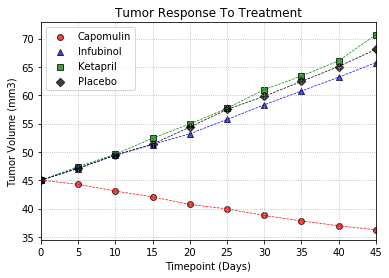

In [6]:
plt.show()
#missing: error bars per plot point

In [13]:
metaStaticMean_df = group_drug_df.mean()['Metastatic Sites']
MSS_indexreset_df = metaStaticMean_df.reset_index()
MSS_indexreset_df.head()

CapomulinMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Capomulin']
InfubinolMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Infubinol']
KetaprilMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Ketapril']
PlaceboMeanVolumeMSS = MSS_indexreset_df.loc[MSS_indexreset_df['Drug'] == 'Placebo']

plt.scatter(CapomulinMeanVolumeMSS['Timepoint'],CapomulinMeanVolumeMSS['Metastatic Sites'], label = 'Capomulin', marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.scatter(InfubinolMeanVolumeMSS['Timepoint'],InfubinolMeanVolumeMSS['Metastatic Sites'], label = 'Infubinol',marker="^", facecolors="blue", edgecolors="black",alpha=0.75)
plt.scatter(KetaprilMeanVolumeMSS['Timepoint'],KetaprilMeanVolumeMSS['Metastatic Sites'], label = 'Ketapril',marker="s", facecolors="green", edgecolors="black",alpha=0.75)
plt.scatter(PlaceboMeanVolumeMSS['Timepoint'],PlaceboMeanVolumeMSS['Metastatic Sites'], label = 'Placebo',marker="D", facecolors="black", edgecolors="black",alpha=0.75)

In [14]:
#plt.xlim(0, max(MSS_indexreset_df['Metastatic Sites']))
plt.title('Metastatic Spread During Treatment')
plt.xlabel("Timepoint/Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")
plt.grid(lineStyle = 'dotted')

plt.plot(CapomulinMeanVolumeMSS['Timepoint'],CapomulinMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7, color="red")
plt.plot(InfubinolMeanVolumeMSS['Timepoint'],InfubinolMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7,color="blue")
plt.plot(KetaprilMeanVolumeMSS['Timepoint'],KetaprilMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7,color="green")
plt.plot(PlaceboMeanVolumeMSS['Timepoint'],PlaceboMeanVolumeMSS['Metastatic Sites'], linestyle='--',linewidth=0.7,color="black")



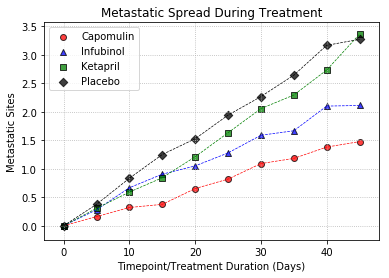

In [15]:
plt.show()
